In [4]:
from main import Solver
import torch
from synth_data import create_synthData_new
from validation_method import FS_MCC
import numpy as np

In [5]:
# Hyper Params Section
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using", torch.cuda.device_count(), "GPUs")

solver = Solver(device)
## Evaluation params
ACC_list = []
FS_list = []
MCC_list = []


Using 0 GPUs


In [7]:
## Scenario 1
FS = []
MCC = []
ACC = []

#x = np.genfromtxt('xdata.csv', delimiter=',')
seed = 0
torch.manual_seed(seed)
#views = [torch.tensor(x)]
N = 100
views = create_synthData_new(2,N, mode=1, F=100)
#views = create_synthData_multi(2, 1,N=400, p=200, q=200, r=200,device='cpu')
#views = create_synthData_hd()

for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

b = [0.015,0.04,0.06]
u = solver.SNGCCA.fit_admm2(views, lamb=b, logging=0)



view_0 :  torch.Size([100, 100])
view_1 :  torch.Size([100, 100])
view_2 :  torch.Size([100, 100])
[tensor(0.3186), tensor(0.3020), tensor(0.3282)]


IndexError: index -1 is out of bounds for dimension 0 with size 0

view_0 :  torch.Size([100, 100])
view_1 :  torch.Size([100, 100])
view_2 :  torch.Size([100, 100])
[tensor(0.2455), tensor(0.3333), tensor(0.2845)]


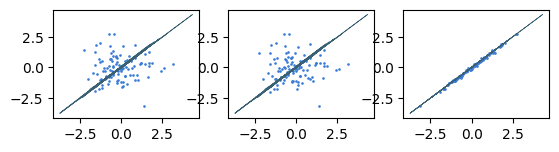

In [11]:
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d

N = 100
views = create_synthData_new(2,N, mode=1, F=100)

for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

b = [0.016,0.04,0.06]
u = solver.SNGCCA.fit_admm2(views, lamb=b, logging=0)
    
#print(u)

gt = torch.zeros((100, 1))
gt[:2] = torch.sqrt(torch.tensor(1/2))

fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

x1 = views[0] @ u[0]
xg1 = views[0][:,0] + views[0][:,1]
y1 = views[1] @ u[1]
yg1 = views[1][:,0] + views[1][:,1]
z1 = views[2] @ u[2]
zg1 = views[2][:,0] + views[2][:,1]
coeff00 =  polyfit(xg1, zg1, 1)
coeff01 = polyfit(yg1, zg1, 1)

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')


In [9]:
macc = np.mean(ACC)
sdacc = np.std(ACC)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS)
sdf = np.std(FS)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC)
sdmcc = np.std(MCC)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

nan nan
nan nan
nan nan


C:\Users\Programer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Programer\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Programer\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Programer\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Programer\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
## Scenario 2
from validation_method import FS_MCC
ACC_2 = []
FS_2 = []
MCC_2 = []
N = 400
views = create_synthData_new(N, mode=2, F=20)
views = [views[2],views[0],views[1]]
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0 = 10
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)
    
    ## fit results
    u = Solver.SNGCCA.fit(views, 1e-7, 300, (b0,b0,b0), loss="Momentum", patience=10, logging=1)
    #u = Solver._get_outputs(views, 1e-7, 300, (b0,b0,b0),logging=1)

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_2.append(acc)
    FS_2.append(f1)
    MCC_2.append(mcc)
print(u)

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


AttributeError: type object 'Solver' has no attribute 'SNGCCA'

view_0 :  torch.Size([100, 100])
view_1 :  torch.Size([100, 100])
view_2 :  torch.Size([100, 100])


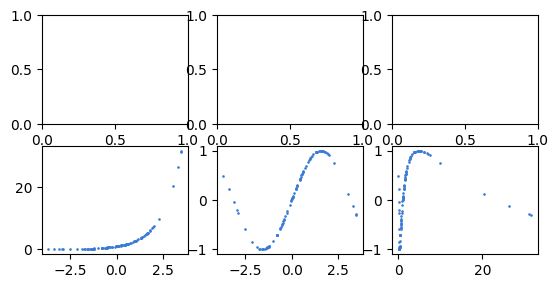

In [3]:
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d
N = 100
views = create_synthData_new(2,N, mode=2, F=100)

for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

b = [0.001,0.004,0.006]
#u = solver.SNGCCA.fit_admm2(views, lamb=b, logging=1)
#print(u)

fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

#x2 = views[0] @ u[0]
xg2 = views[0][:,0] + views[0][:,1]
#y2 = views[1] @ u[1]
yg2 = views[1][:,0] + views[1][:,1]
#z2 = views[2] @ u[2]
zg2 = views[2][:,0] + views[2][:,1]


#ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
#ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
#ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
#ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
#ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
#ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')

#ax4.scatter(x2,y2,s=0.8,c='#3a7bd5')
ax4.scatter(xg2,yg2,s=0.8,c='#3a7bd5')
#ax5.scatter(x2,z2,s=0.8,c='#3a7bd5')
ax5.scatter(xg2,zg2,s=0.8,c='#3a7bd5')
#ax6.scatter(y2,z2,s=0.8,c='#3a7bd5')
ax6.scatter(yg2,zg2,s=0.8,c='#3a7bd5')



In [10]:
macc = np.mean(ACC_2)
sdacc = np.std(ACC_2)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_2)
sdf = np.std(FS_2)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_2)
sdmcc = np.std(MCC_2)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9434999999999999 0.14647515906194547
0.8933763128080017 0.2738150324505891
0.8753058894507663 0.323405773174309


In [12]:
## Scenario 3
FS_3 = []
MCC_3 = []
ACC_3 = []
N = 400
views = create_synthData_new(N, mode=3, F=20)

print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0=5.00
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)

    ## fit results
    u = Solver._get_outputs(views, 1e-7, 200, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_3.append(acc)
    FS_3.append(f1)
    MCC_3.append(mcc)


input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


In [12]:
macc = np.mean(ACC_3)
sdacc = np.std(ACC_3)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_3)
sdf = np.std(FS_3)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_3)
sdmcc = np.std(MCC_3)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9926666666666665 0.00922556833539872
0.9664835164835165 0.04168226170336305
0.9640339979497794 0.044583148679418254


In [13]:
print(ACC_list)
print(FS_list)
print(MCC_list)

[[0.9975999999999999, 0.00639583197611279], [0.9434999999999999, 0.14647515906194547], [0.9926666666666665, 0.00922556833539872]]
[[0.9890549450549452, 0.02889918516206012], [0.8933763128080017, 0.2738150324505891], [0.9664835164835165, 0.04168226170336305]]
[[0.9882629549372325, 0.030909214124223112], [0.8753058894507663, 0.323405773174309], [0.9640339979497794, 0.044583148679418254]]


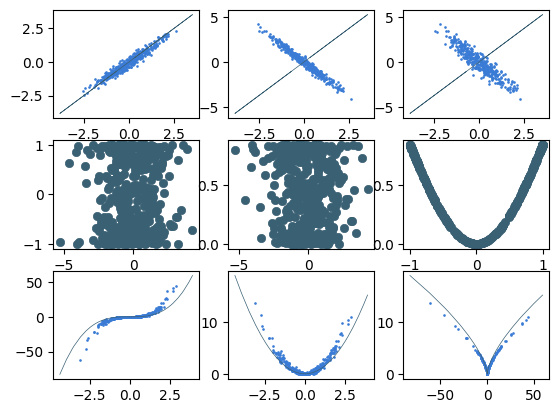

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x3 = views[0] @ u[0]
xg3 = sorted(views[0][:,0] + views[0][:,1])
y3 = views[1] @ u[1]
z3 = views[2] @ u[2]

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')

#ax4.scatter(x2,y2,s=0.8,c='#3a7bd5')
ax4.scatter(xg2, yg2, linewidth=0.5, c='#3a6073')
#ax5.scatter(x2,z2,s=0.8,c='#3a7bd5')
ax5.scatter(xg2,zg2,linewidth=0.5,c='#3a6073')
#ax6.scatter(y2,z2,s=0.8,c='#3a7bd5')
ax6.scatter(yg2,zg2,linewidth=0.5,c='#3a6073')

ax7.scatter(x3,y3,s=0.8,c='#3a7bd5')
ax7.plot(xg3,np.power(xg3,3),linewidth=0.5,c='#3a6073')
ax8.scatter(x3,z3,s=0.8,c='#3a7bd5')
ax8.plot(xg3,np.power(xg3,2),linewidth=0.5,c='#3a6073')
ax9.scatter(y3,z3,s=0.8,c='#3a7bd5')
ax9.plot(np.power(xg3,3),np.power(xg3,2),linewidth=0.5,c='#3a6073')